<h1>INSTANCE-BASED LEARNING</h1>
<h2>From the book: Machine Learning by Tom M. Mitchell page 230</h2>
<img src="images/inst.jpg">

<h1 title='K-Nearest Neighbour'>K-NN</h1>

The KNN is one of the simplest machine learning algorithms and an example of instance-based learning, where new instances are predicted based on stored instances. k-nearest neighbors algorithm (k-NN) is a supervised nonparametric method used for both classification (data with discrete labels) and regression (data with continuous labels) but  widely used for classification problems. At the heart of this method is the K ( The number of nearest neighbors to look for) parameter. Unlike other supervised learning algorithms, K-NN does not learn an explicit mapping f from the training data which will used in making predictions or classifying new instances but instead with a predefined K, KNN finds the K training samples that are closest to the new instance based some distance or similarity function such as Euclidean (commonly used), Manhattan, Mahalanobis, cosine similarity function and predict the label from these K closest training example.

<h1 title='K-NN USED AS A CLASSIFIER'>In classification settings</h1> 
Once k is selected, given a new instance the method assigns a label to a new instance (unlabeled vector) based on the k closest training data points,  that is a new instance is classified by assigning the label which is most frequent or common among the k training samples nearest to that new instance.

<h1 title='K-NN USED AS A REGRESSOR'>In regression </h1>
assign the average response (Average the values of k nearest neighbors)  of the of k nearest neighbors

<h1> K-Nearest Neighbors Algorithm </h1>
<ul>
    <li>Determine parameter K </li>
    <li>Compute the distance of the new instance from each training point </li>
   <li>Sort the distances in ascending (or descending) order </li>
<li>Select the K nearest neighbors based on the sorted distances </li>
<li>Use majority rule (for classification) or averaging (for regression)</li>
</ul>

<h1>NOTE</h1>
The choice of distance or similarity function depends on the type of features in the dataset

The experimental results from [Effects of Distance Measure Choice on KNN Classifier Performance - A Review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4978658/) show that the performance of KNN classifier depends significantly on the distance measure used. The results also show that some distance measure are less affected by added noise.


In [1]:
library(ggplot2)
library(caret)
library(class)

Warning message:
"package 'caret' was built under R version 3.5.3"
Loading required package: lattice

Warning message:
"package 'class' was built under R version 3.5.3"


<h2>loading the iris dataset</h2>

In [2]:
data(iris)

# displaying the first two observations

In [3]:
head(iris,2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa



# structure of the dataset

In [4]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



# the data contain 150 observations (instances) and 4 variables(features) and a target variable

In [5]:
print(summary(iris))

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


In [6]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

# the names of the variables are 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'  and the target variable is'Species'

# number of instances in each category or class

In [7]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [8]:
# recoding the variable names

In [9]:
names(iris)<-c('Sepal_Length', 'Sepal_Width', 'Petal_Length' ,'Petal_Width', 'Species')

In [10]:
save(iris,file = 'data/iris.csv')

In [11]:
head(iris,3)

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


# scatter plot of Sepal_width vrs Sepal_length'

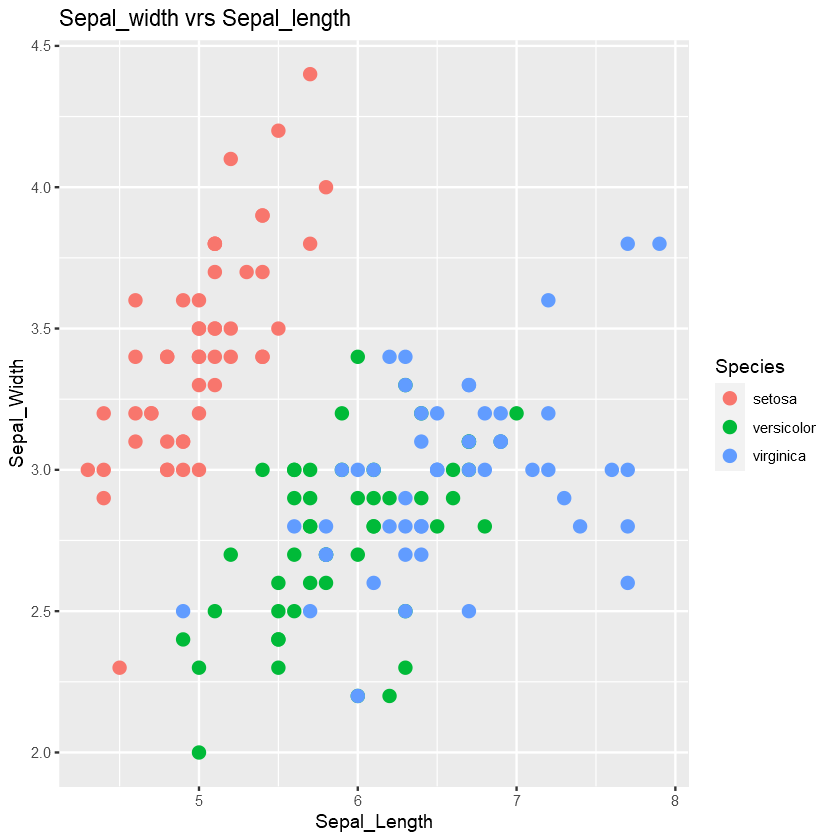

In [12]:
ggplot(iris,aes(x=Sepal_Length,y=Sepal_Width,colour = Species))+geom_point(size=3)+ggtitle('Sepal_width vrs Sepal_length')


from the graph there sepal length and the sepal width of the Setosa is highly correlated but the correlation for Virginica and
Versicolor is showhow less

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



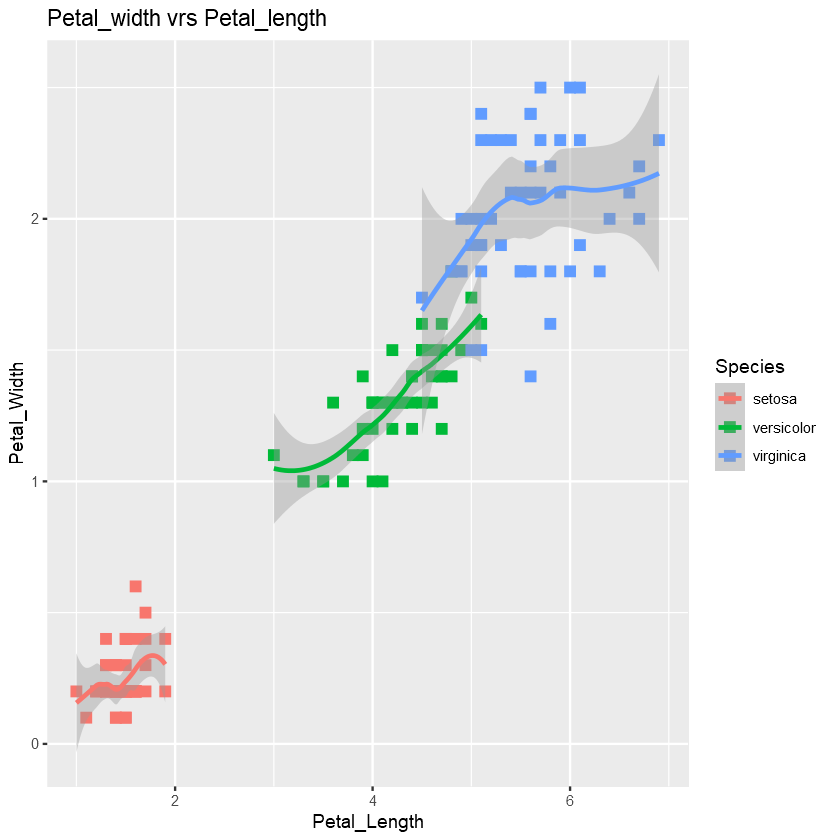

In [13]:
ggplot(iris,aes(x=Petal_Length,y=Petal_Width,colour = Species))+geom_point(size=3,shape=15)+geom_smooth()+
ggtitle('Petal_width vrs Petal_length')

from the graph there petal length and the petall width of the Setosa, Virginica and Versicolor are highly correlated

# MIN-Max normalization

In [14]:
min_max<-function(x){
  num<-x-min(x)
  deno<-max(x)-min(x)
  return(num/deno)
  }

In [15]:
normalized_iris<-as.data.frame(lapply(iris[1:4],min_max))

In [16]:
head(normalized_iris,3)

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0.2222222,0.6250000,0.06779661,0.04166667
0.1666667,0.4166667,0.06779661,0.04166667
0.1111111,0.5000000,0.05084746,0.04166667


In [17]:
normalized_iris<-cbind(normalized_iris,iris[5])

In [18]:
head(normalized_iris,3)

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0.2222222,0.6250000,0.06779661,0.04166667,setosa
0.1666667,0.4166667,0.06779661,0.04166667,setosa
0.1111111,0.5000000,0.05084746,0.04166667,setosa


# spliting the dataset into training and testing dataset with 30% for testing

In [19]:
ind<-sample(2,nrow(normalized_iris),replace = TRUE,prob = c(0.7,0.3))

In [20]:
iris_train<-normalized_iris[ind==1,1:4]
y_train<-normalized_iris[ind==1,5]

iris_test<-normalized_iris[ind==2,1:4]
y_test<-normalized_iris[ind==2,5]

# fitting KNN model with k=6

In [21]:
k_nn<-knn(train = iris_train,test = iris_test,cl = y_train,k = 6)

In [22]:
acc<-100*sum(y_test==k_nn)/length(y_test)
acc

[1] 97.67442

# comparing the predicted class with the true class

In [23]:
k_nn==y_test

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

# confusion matrix

In [24]:
table(k_nn,y_test)

            y_test
k_nn         setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         14         1
  virginica       0          0        12

In [25]:
confusionMatrix(table(k_nn,y_test))

Confusion Matrix and Statistics

            y_test
k_nn         setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         14         1
  virginica       0          0        12

Overall Statistics
                                          
               Accuracy : 0.9767          
                 95% CI : (0.8771, 0.9994)
    No Information Rate : 0.3721          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.965           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9231
Specificity                 1.0000            0.9655           1.0000
Pos Pred Value              1.0000            0.9333           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
Prev